In [42]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [43]:

# بارگذاری داده‌ها (فرض می‌کنیم داده‌ها در یک فایل CSV هستند)
data = pd.read_csv('1632560262896716.csv')

In [44]:

# بررسی ساختار داده‌ها
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [45]:

# حذف ستون CustomerID (زیرا برای خوشه‌بندی کاربردی ندارد)
data = data.drop('CustomerID', axis=1)

In [46]:

# تبدیل داده‌های غیر عددی (مانند جنسیت) به مقادیر عددی
labelencoder = LabelEncoder()
data['Gender'] = labelencoder.fit_transform(data['Gender'])

In [47]:

# مقیاس‌بندی داده‌ها (خیلی مهم برای خوشه‌بندی)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

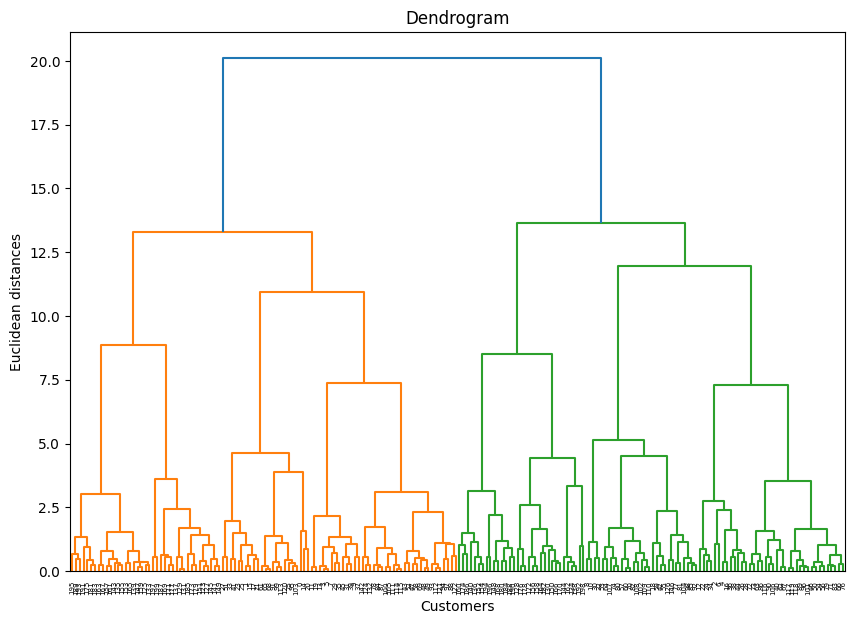

In [48]:

# رسم دندوگرام برای شناسایی تعداد خوشه‌ها
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [49]:
# اعمال خوشه‌بندی سلسله‌مراتبی (Agglomerative)
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(data_scaled)

In [50]:

# اضافه کردن خوشه‌ها به داده‌ها
data['Cluster'] = y_hc

# نمایش نتایج خوشه‌بندی
print(data.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0       1   19                  15                      39        0
1       1   21                  15                      81        0
2       0   20                  16                       6        3
3       0   23                  16                      77        0
4       0   31                  17                      40        3


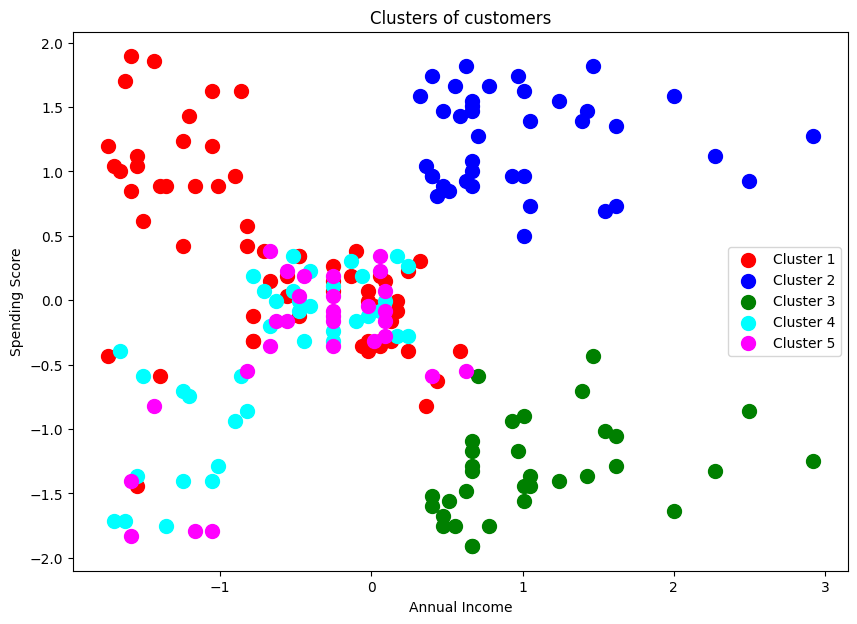

In [51]:

# رسم نتایج خوشه‌بندی
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled[y_hc == 0, 2], data_scaled[y_hc == 0, 3], s=100, c='red', label='Cluster 1')
plt.scatter(data_scaled[y_hc == 1, 2], data_scaled[y_hc == 1, 3], s=100, c='blue', label='Cluster 2')
plt.scatter(data_scaled[y_hc == 2, 2], data_scaled[y_hc == 2, 3], s=100, c='green', label='Cluster 3')
plt.scatter(data_scaled[y_hc == 3, 2], data_scaled[y_hc == 3, 3], s=100, c='cyan', label='Cluster 4')
plt.scatter(data_scaled[y_hc == 4, 2], data_scaled[y_hc == 4, 3], s=100, c='magenta', label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()
